# Question 1

In [46]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [47]:
def compact_SVD(A, tol=1e-1):
    lamb, V = la.eig(A.conj().T @ A)
  
    sig = np.sqrt(lamb)

    sort_idx = np.argsort(sig)[::-1]
    sig = sig[sort_idx]
    V = V[:,sort_idx]
    
    r = len(sig[sig > tol])

    sigC = sig[:r]
    Vc = V[:,:r]
    
    U = A @ (Vc / sigC)
    return np.real(U), sigC, np.real(Vc.conj().T)

In [48]:
A = np.random.random((10,5)) # 1e-5*np.ones((10,5))

U, sigC, Vh = compact_SVD(A)
U1, s1, Vh1 = la.svd(A, full_matrices=False)

print('U orthonomal?',np.allclose(U.T @ U, np.eye(5)))
print('U sig Vh = A ? ', np.allclose(U @ np.diag(sigC) @ Vh, A))
print('Correct rank?', np.linalg.matrix_rank(A) == len(sigC))

U orthonomal? True
U sig Vh = A ?  True
Correct rank? True


# Question 2

In [49]:
def visualize(A):
    domain = np.linspace(0, 2*np.pi, 200)
    s = np.zeros((2,200))
    s[0,:] = [np.cos(theta) for theta in domain]
    s[1,:] = [np.sin(theta) for theta in domain]
    
    E = np.array(([1, 0, 0],[0, 0, 1]))
    U, sig, Vh = la.svd(A)
    
    fig, axes = plt.subplots(2,2, figsize=(10,10))
    
    axes[0,0].plot(s[0,:], s[1,:])
    axes[0,0].plot(E[0,:], E[1,:])
    axes[0,1].plot((Vh @s)[0,:], (Vh@s)[1,:])
    axes[0,1].plot((Vh @E)[0,:], (Vh@E)[1,:])
    axes[1,0].plot(((sig*np.eye(2))@Vh@s)[0,:],(sig*np.eye(2)@Vh@s)[1,:])
    axes[1,0].plot(((sig*np.eye(2))@Vh@E)[0,:],(sig*np.eye(2)@Vh@E)[1,:])
    axes[1,1].plot(((U@sig*np.eye(2))@Vh@s)[0,:],(U@(sig*np.eye(2))@Vh@s)[1,:])
    axes[1,1].plot((U@(sig*np.eye(2))@Vh@E)[0,:],(U@(sig*np.eye(2))@Vh@E)[1,:])
       

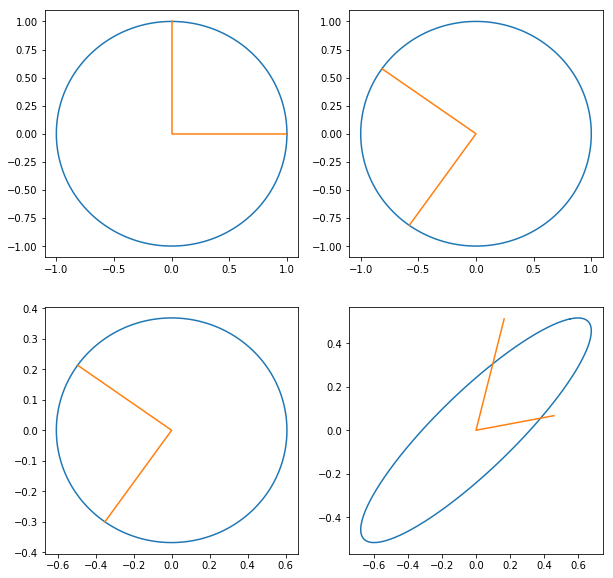

In [50]:
A = np.random.random((2,2))
visualize(A)

# Question 3

In [51]:
def compressed_svd(A, s):
    U, sig, Vh = la.svd(A)
    
    if s > np.linalg.matrix_rank(A):
        raise ValueError('s is larger than rank(A)')
    
    U = U[:,:s]

    sig = sig[0:s]
    Vh = Vh[:s, :]
    
    size = U.size + sig.size + Vh.size
    
    return U @ np.diag(sig) @ Vh, size
    

In [52]:
A = np.random.random((20,20))
a,d = compressed_svd(A,s=5)
d

205

# Question 4

In [53]:
def prob4(A, ϵ=1e-1):
    
    U, σ, V = la.svd(A)
    
    if ϵ < σ.min():
        raise ValueError('ϵ is too small')
        
    s = len(σ[σ > ϵ])

    U_s = U[:, :s]
    σ_s = σ[:s]
    V_s = V[:s, :]
    
    return U_s @ np.diag(σ_s) @ V_s

In [54]:
A = np.random.random((6,6))
prob4(A)

array([[0.00572336, 0.72909643, 0.67943599, 0.87387839, 0.92572112,
        0.97486259],
       [0.68175928, 0.18957585, 0.80186823, 0.37960508, 0.11928778,
        0.88104326],
       [0.45206176, 0.10652   , 0.07994012, 0.74559222, 0.82854917,
        0.79475083],
       [0.23808973, 0.78099683, 0.91406874, 0.13275911, 0.58108521,
        0.18039459],
       [0.32291449, 0.16277286, 0.50028643, 0.48143418, 0.75382465,
        0.29188743],
       [0.31011666, 0.4781371 , 0.15824139, 0.09354941, 0.62511093,
        0.06632317]])

In [55]:
la.svd(A)[1]

array([3.05240927, 1.02325607, 0.89881045, 0.61034634, 0.32253403,
       0.06239514])

In [56]:
la.norm(A - prob4(A))

0.062395136449901537

# Question 5 (incomplete)

In [57]:
def compress_image(file_name, s):
    
    image = plt.imread(file_name) / 255
    
    if image.ndim == 3:                       # Color image
        C = []
        v_total = 0
        for i in range(3):
            color = image[:, :, i]
            color_s, v = compressed_svd(color, s)
            v_total += v
            color_s[color_s < 0] = 0
            color_s[color_s > 1] = 1
            C.append(color_s)
        return np.dstack(C), v_total
            
    elif image.ndim == 2:                    # Grayscale image
        image_s, v = compact_svd(image, s)
        image_s[image_s < 0] = 0
        image_s[image_s > 1] = 1
        return image_s, v

In [58]:
compressed_image, v_compressed = compress_image('hubble.jpg', 15)
image = plt.imread('hubble.jpg') / 255

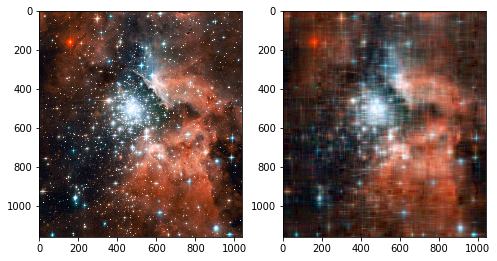

In [59]:
fig, axes = plt.subplots(1,2, figsize=(8,6))

axes[0].imshow(image)
axes[1].imshow(compressed_image)

In [60]:
image = plt.imread('alex.jpeg') / 255
compressed_image, v_compressed = compress_image('alex.jpeg', 10)

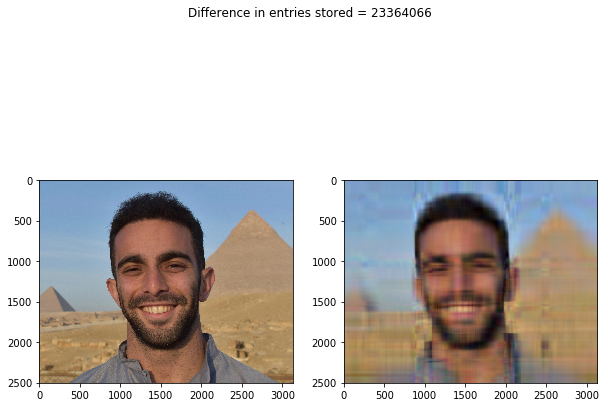

In [61]:
fig, axes = plt.subplots(1,2, figsize=(10,8))

axes[0].imshow(image, cmap='gray')
axes[1].imshow(compressed_image, cmap='gray')

plt.suptitle(f'Difference in entries stored = {image.size - v_compressed}')
plt.show()